In [113]:
library(ZINB.GP)
library(Matrix)
library(sp)
library(basemaps)
library(ggplot2)
library(sf)
library(ggOceanMaps)

ggOceanMaps: Setting data download folder to a temporary folder
/tmp/RtmpA7Hezi. This means that any downloaded map data need to be
downloaded again when you restart R. To avoid this problem, change the
default path to a permanent folder on your computer. Add following
lines to your .Rprofile file: {.ggOceanMapsenv <- new.env();
.ggOceanMapsenv$datapath <- 'YourCustomPath'}. You can use
usethis::edit_r_profile() to edit the file. '~/ggOceanMapsLargeData'
would make it in a writable folder on most operating systems.


Attaching package: ‘ggOceanMaps’




The following object is masked from ‘package:basemaps’:

    basemap




In [2]:
sf_proj_search_paths(c("/home/mascott/work/R_Proj/usr/share/proj"))

[1] "/home/mascott/work/R_Proj/usr/share/proj"

In [159]:
setwd("/home/mascott/work/ZINBR/experiments/surge")

In [4]:
load("out.rda")

In [5]:
attributes(output)

$names
 [1] "Alpha"   "Beta"    "A"       "B"       "C"       "D"       "L1t"    
 [8] "Sigma1t" "Noise1t" "L2t"     "Sigma2t" "Noise2t" "L1s"     "Sigma1s"
[15] "Noise1s" "L2s"     "Sigma2s" "Noise2s" "R"       "Y_pred"  "at_risk"

In [6]:
logit <- \(x) log(x / (1 - x))

Trace plots for coefficients|


In [161]:
xcols <- c("intercept", "windu", "windv", "temp", "gaugeOn")
for (i in 1:ncol(output$Alpha))
{
    png(paste("trace/conv", xcols[i], "lr.png", sep=""), width = 800, height = 800, units = "px", res = 150) 
    plot(output$Alpha[,i], main=paste("LR coefficient:", xcols[i]), type="o")
    dev.off()
}
for (i in 1:ncol(output$Beta))
{
    png(paste("trace/conv", xcols[i], "nb.png", sep=""), width = 800, height = 800, units = "px", res = 150)
    plot(output$Beta[,i], main=paste("NB coefficient:", xcols[i]), type="o")
    dev.off()
}

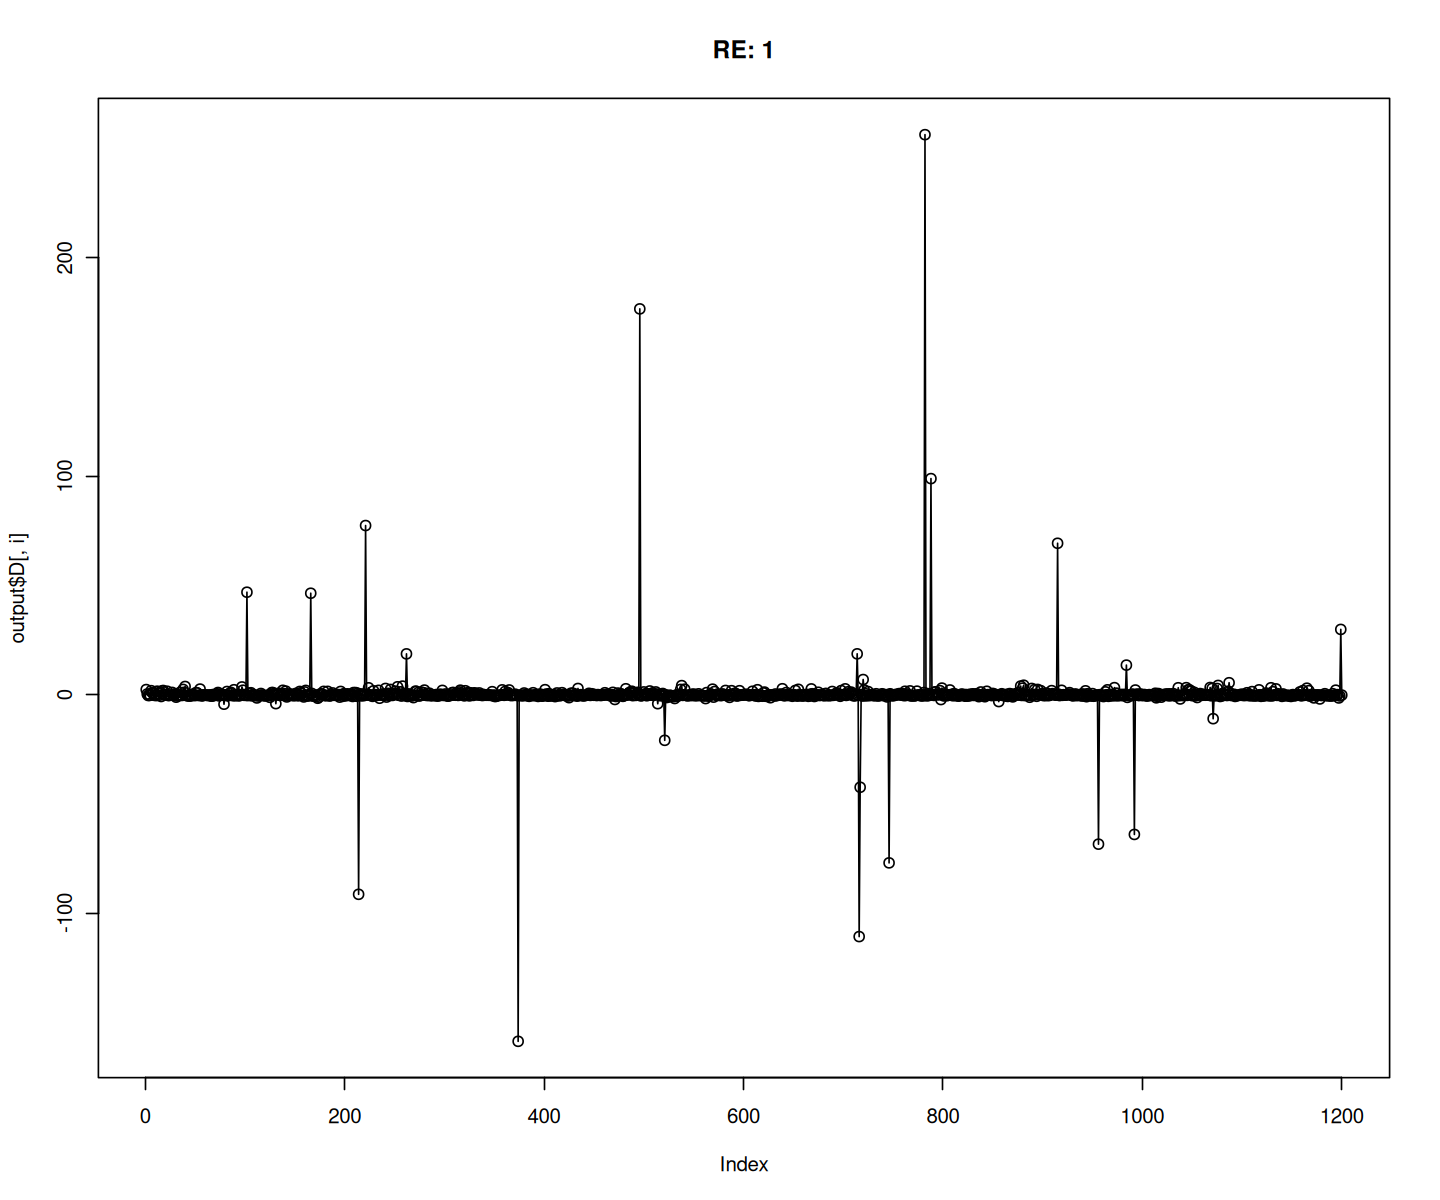

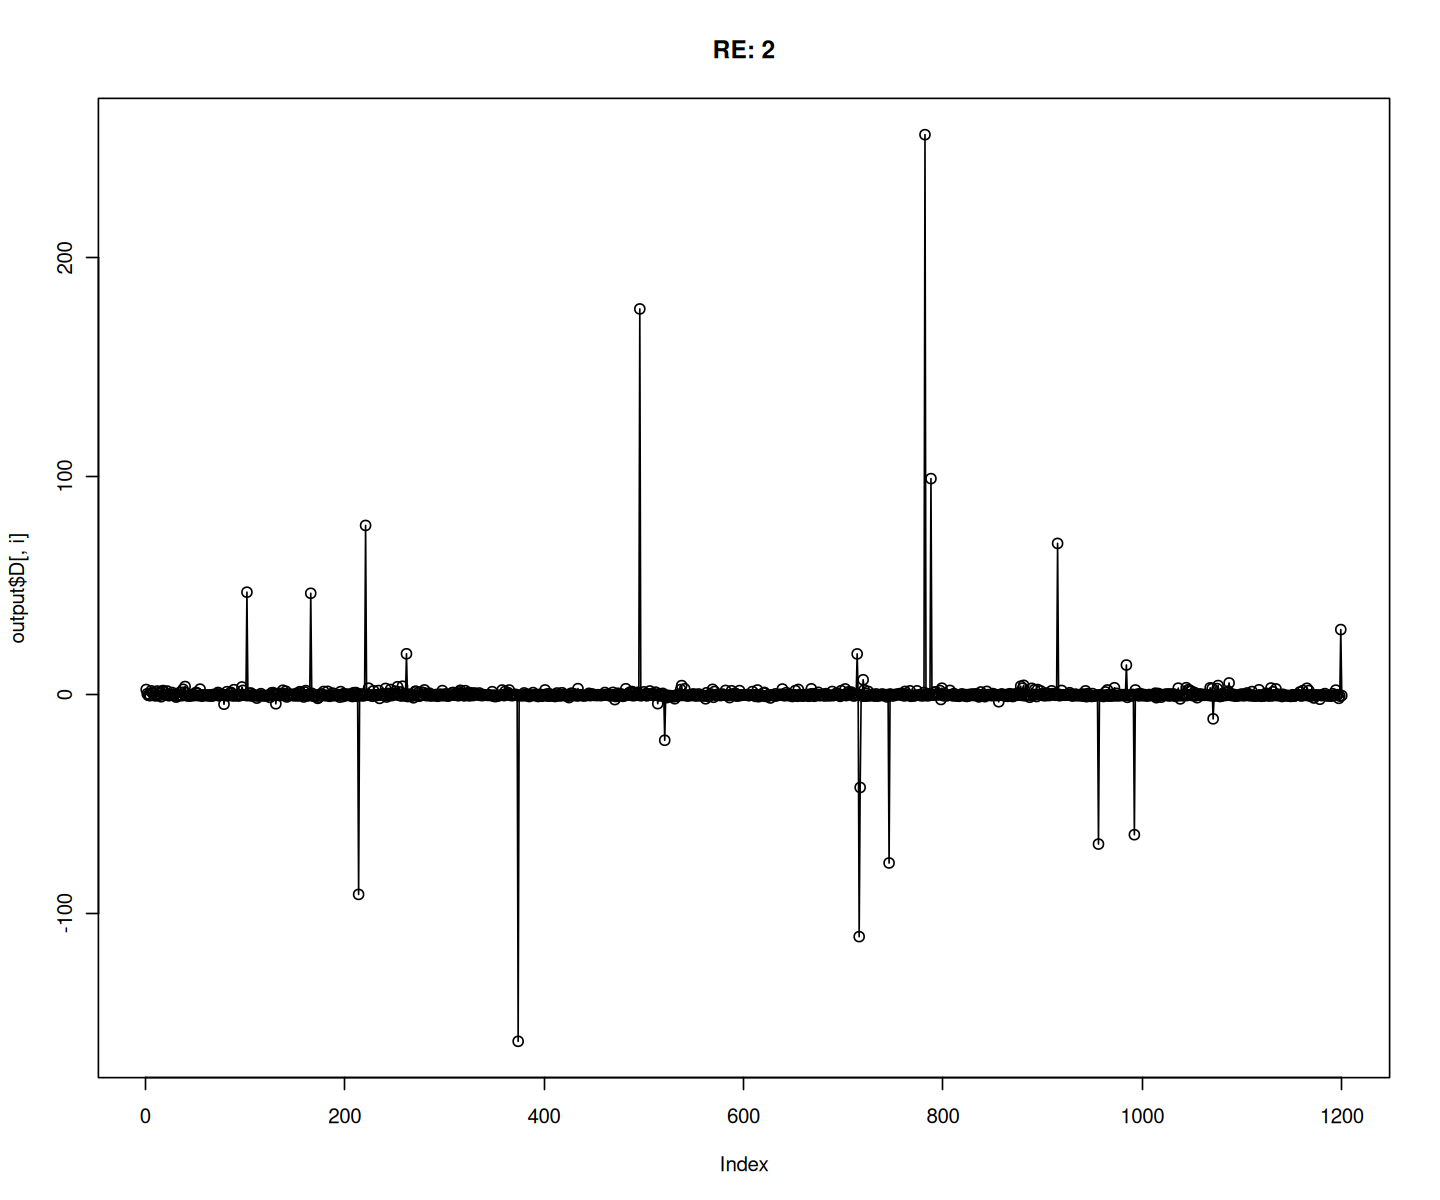

In [162]:
for (i in 1:2)
{
    plot(output$D[,i], main=paste("RE:", i), type="o")
}

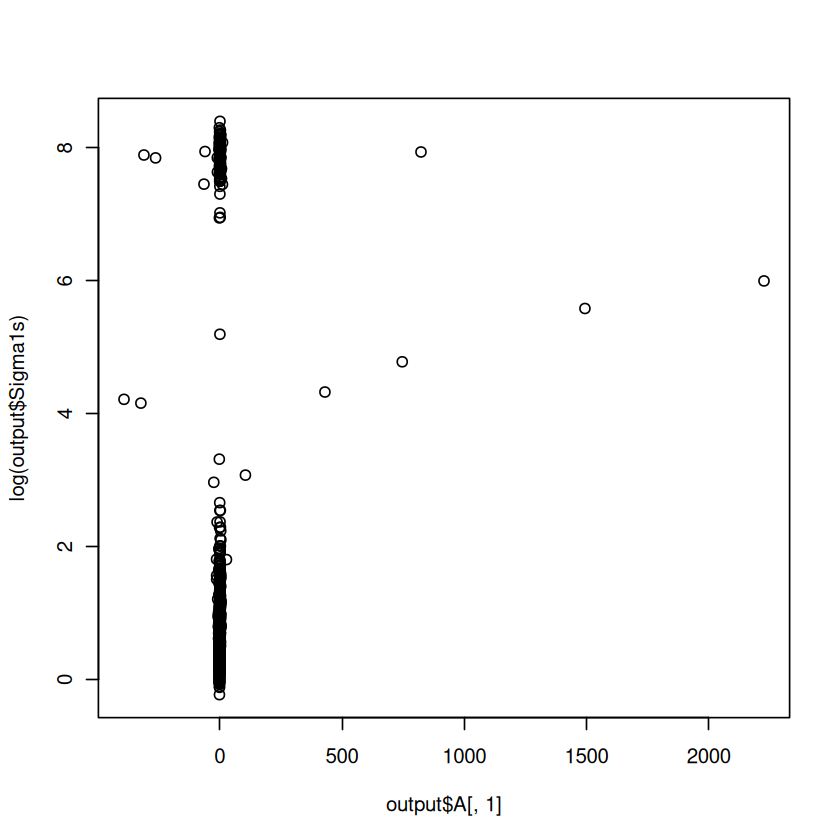

In [17]:
plot(output$A[,1], log(output$Sigma1s))

In [163]:
png("trace/trR.png", width = 800, height = 800, units = "px", res = 150) 
plot(output$R, main="R", type="o")
dev.off()

png 
  2

In [167]:
png("trace/trl1t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$L1t), main="L1t", type="o")
dev.off()
png("trace/trl1s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$L1s), main="L1s", type="o")
dev.off()

png("trace/trl2t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$L2t), main="L2t", type="o")
dev.off()
png("trace/trl2s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$L2s), main="L2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [169]:
png("trace/trsigma1t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma1t), main="Sigma1t", type="o")
dev.off()
png("trace/trsigma1s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma1s), main="Sigma1s", type="o")
dev.off()

png("trace/trsigma2t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma2t), main="Sigma2t", type="o")
dev.off()
png("trace/trsigma2s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma2s), main="Sigma2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [171]:
png("trace/trnr1t.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise1t), main="Noise1t", type="o")
dev.off()
png("trace/trnr1s.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise1s), main="Noise1s", type="o")
dev.off()

png("trace/trnr2t.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise2t), main="Noise2t", type="o")
dev.off()
png("trace/trnr2s.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise2s), main="Noise2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

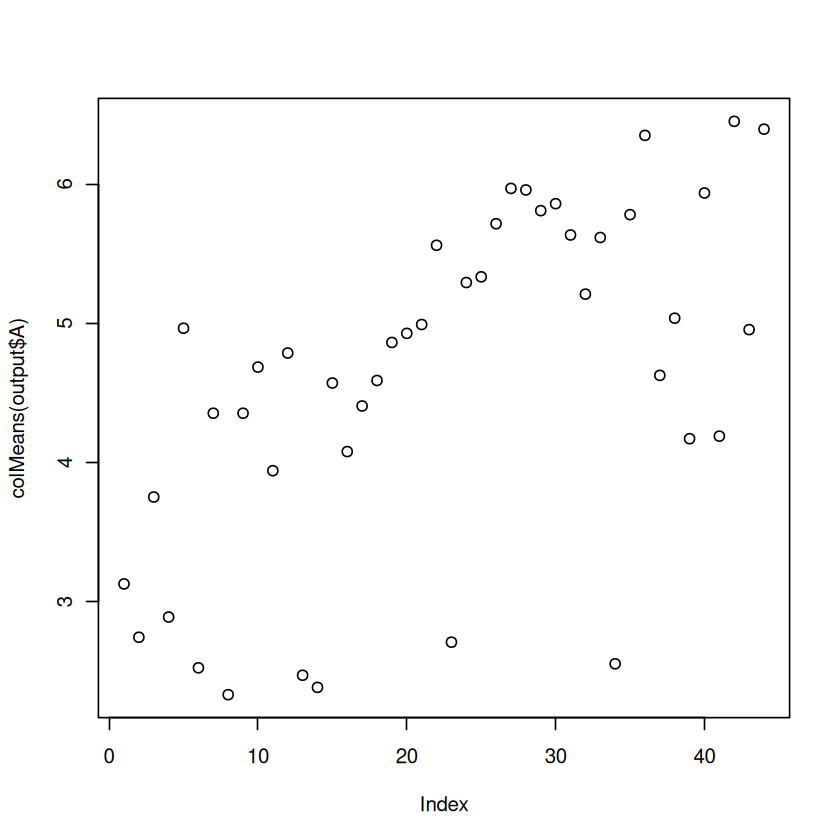

In [139]:
plot(colMeans(output$A))

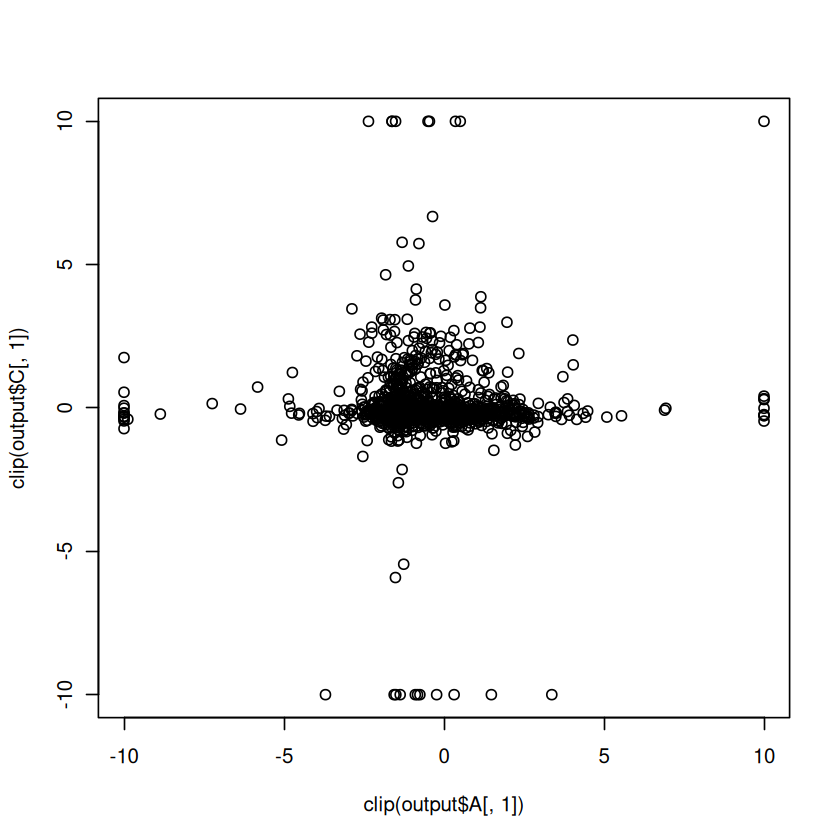

In [144]:
plot(clip(output$A[,1]), clip(output$C[,1]))

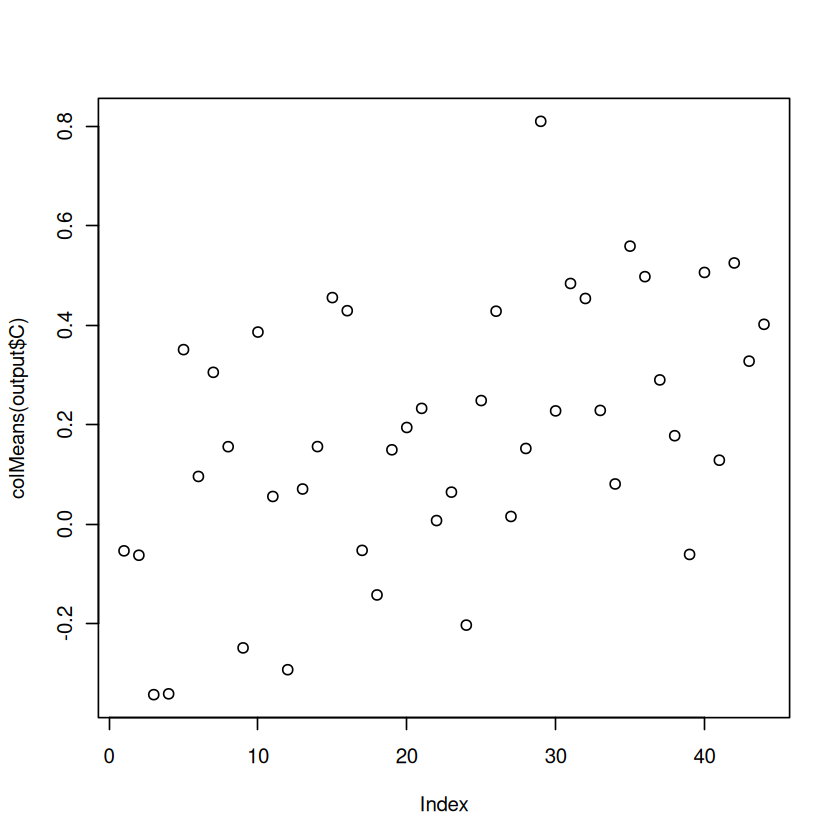

In [ ]:
plot(colMeans(output$C))

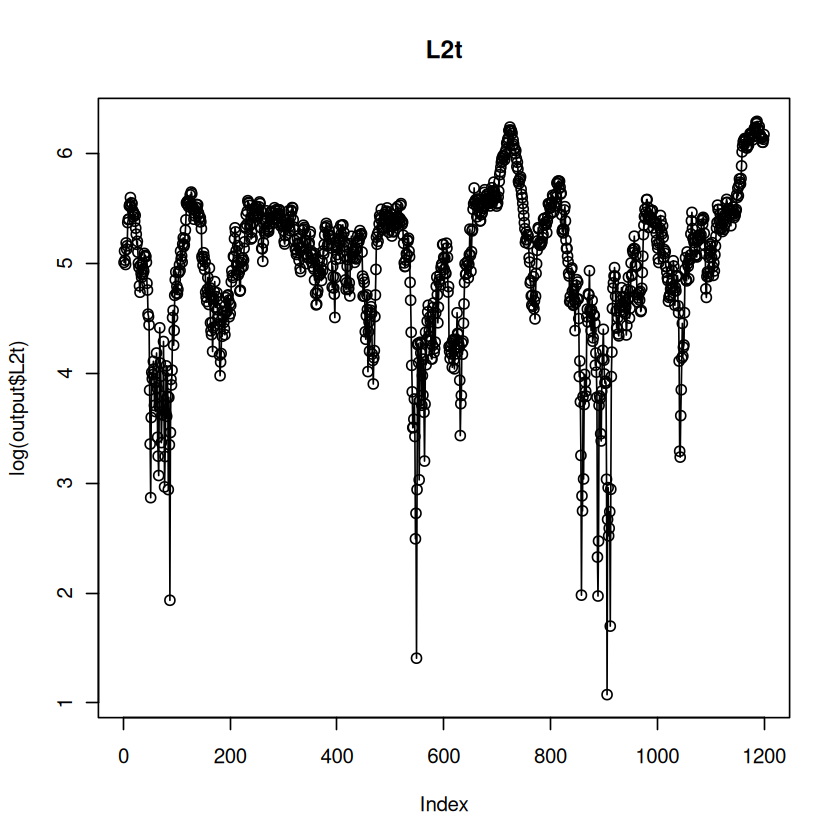

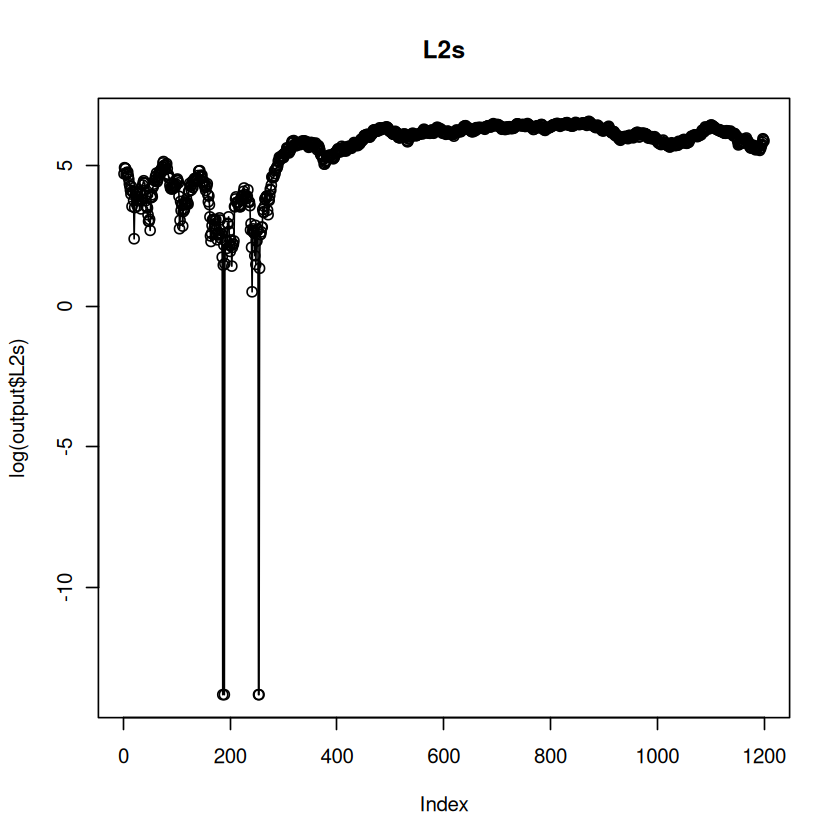

In [25]:
plot(log(output$L2t), main="L2t", type="o")
plot(log(output$L2s), main="L2s", type="o")

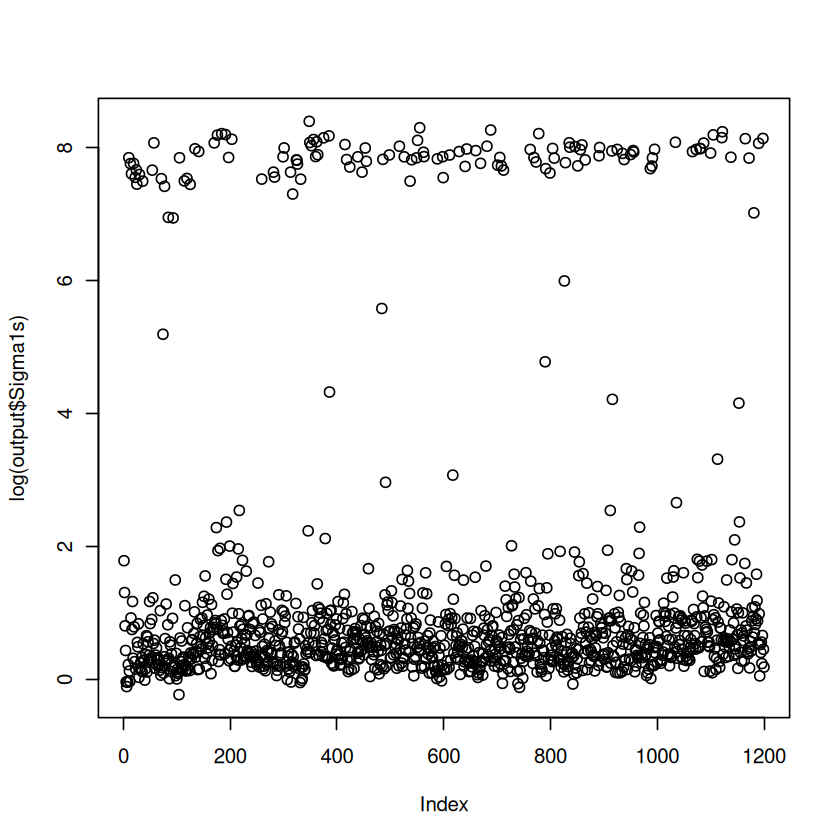

In [12]:
plot(log(output$Sigma1s))

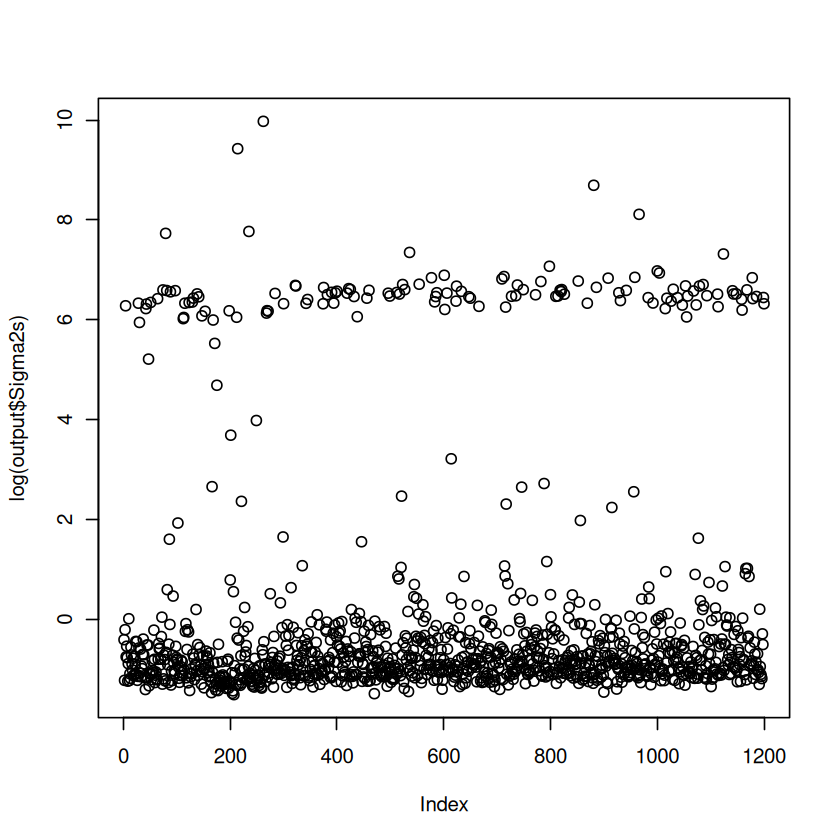

In [19]:
plot(log(output$Sigma2s))

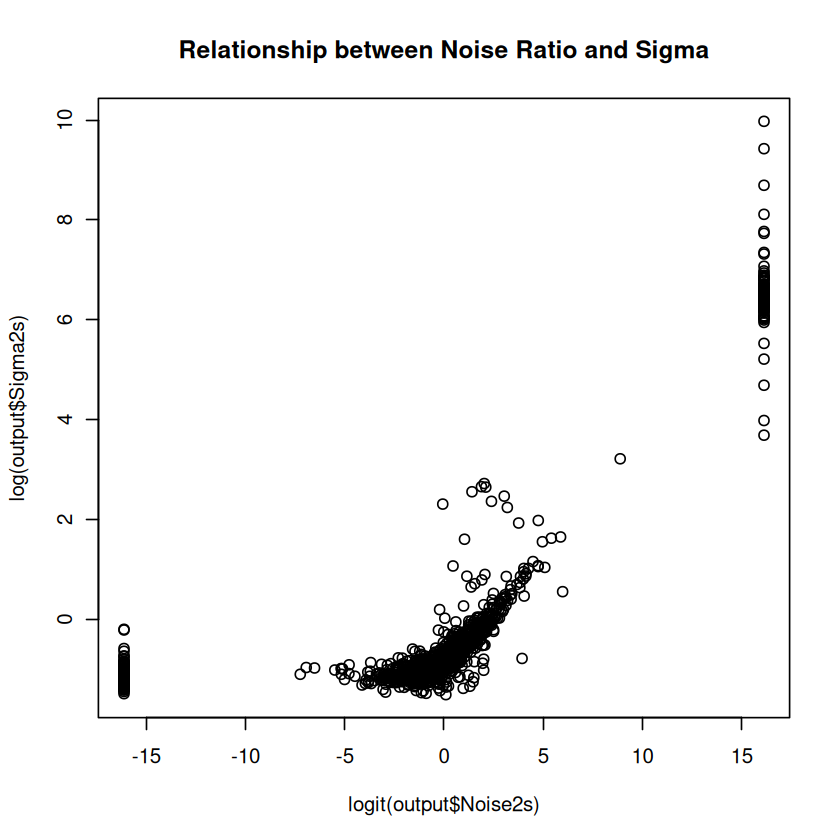

In [35]:
plot(logit(output$Noise2s), log(output$Sigma2s), main="Relationship between Noise Ratio and Sigma")

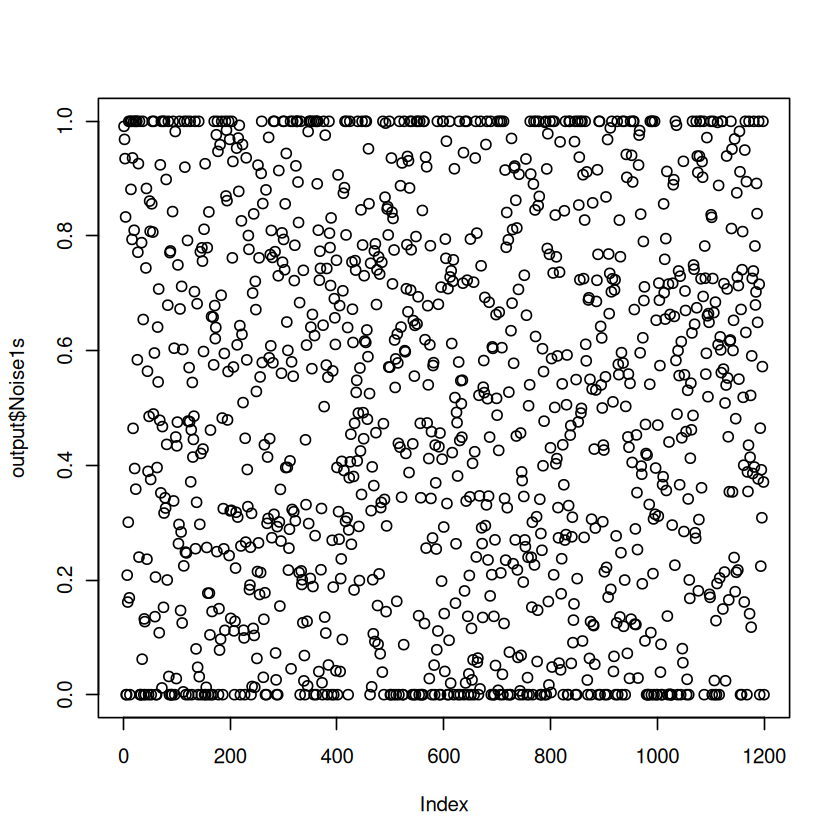

In [13]:
plot(output$Noise1s)

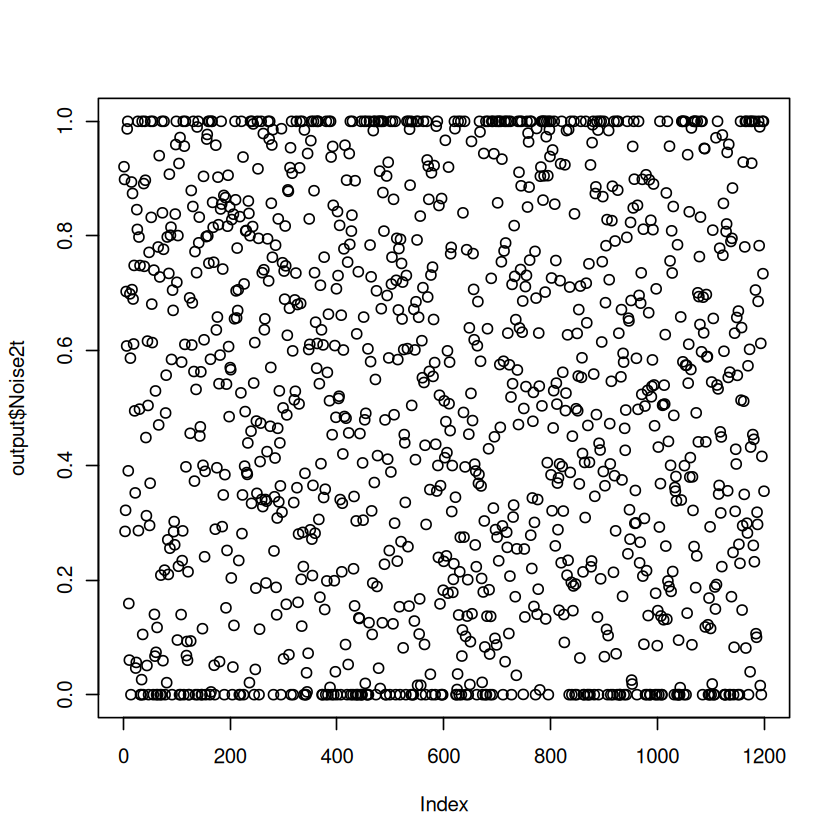

In [14]:
plot(output$Noise2t)

In [7]:
obs_y <- read.csv("ydata_daily.csv")
Xdata <- read.csv("Xdata_daily.csv")
obs_y$day <- NULL
Xdata$day <- NULL

N <- nrow(obs_y) * ncol(obs_y)
Vs <- as.matrix(sparseMatrix(i=1:N, j=rep(1:ncol(obs_y), nrow(obs_y)), x=1))
Vt <- as.matrix(sparseMatrix(i=1:N, j=rep(as.integer(Xdata$Month) + 1, each=ncol(obs_y)), x=1))
y <- as.vector(t(as.matrix(unname(obs_y))))

print(dim(Vt))
print(dim(Xdata))

xcols <- c("windu", "windv", "temp", "gaugeOn")
X <- Matrix(0, nrow=nrow(Vs), ncol=length(xcols) + 1, sparse = FALSE)
j <- 2
X[, 1] <- 1
for (xcol in xcols)
{
    print(xcol)
    z <- 1
    stuff <- rep("", 44)

    for (i in 0:43)
    {
        stuff[i + 1] <- paste(xcol, "_", i, sep="")
    }
    X[,j] <- as.vector(t(as.matrix(unname(Xdata[, stuff]))))

    j <- j + 1
}

months <- as.matrix(unname(read.csv("monthEmbedding.csv")))
lonlat <- read.csv("tidelocs.csv")
coordinates(lonlat) <- c("lon", "lat")
proj4string(lonlat) <- CRS("+proj=longlat +datum=WGS84")
coords <- as(spTransform(lonlat, CRS("+proj=utm +zone=17 ellps=WGS84")), "SpatialPoints")
coords <- as.matrix(unname(attributes(coords)$coords)) / 1000
Ds <- as.matrix(dist(coords))
Dt <- as.matrix(dist(months) * 20)
X <- as.matrix(X)

[1] 642840     12
[1] 14610   179
[1] "windu"
[1] "windv"
[1] "temp"
[1] "gaugeOn"


In [9]:
clip <- \(x) pmax(pmin(x, 10), -10)

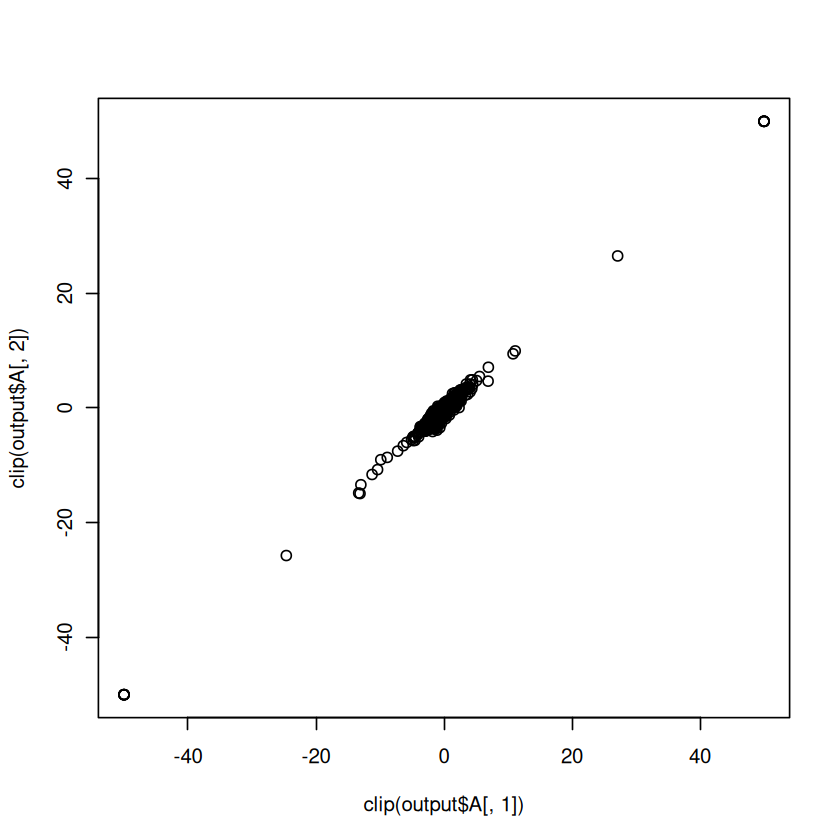

In [82]:
plot(clip(output$A[,1]), clip(output$A[,2]))

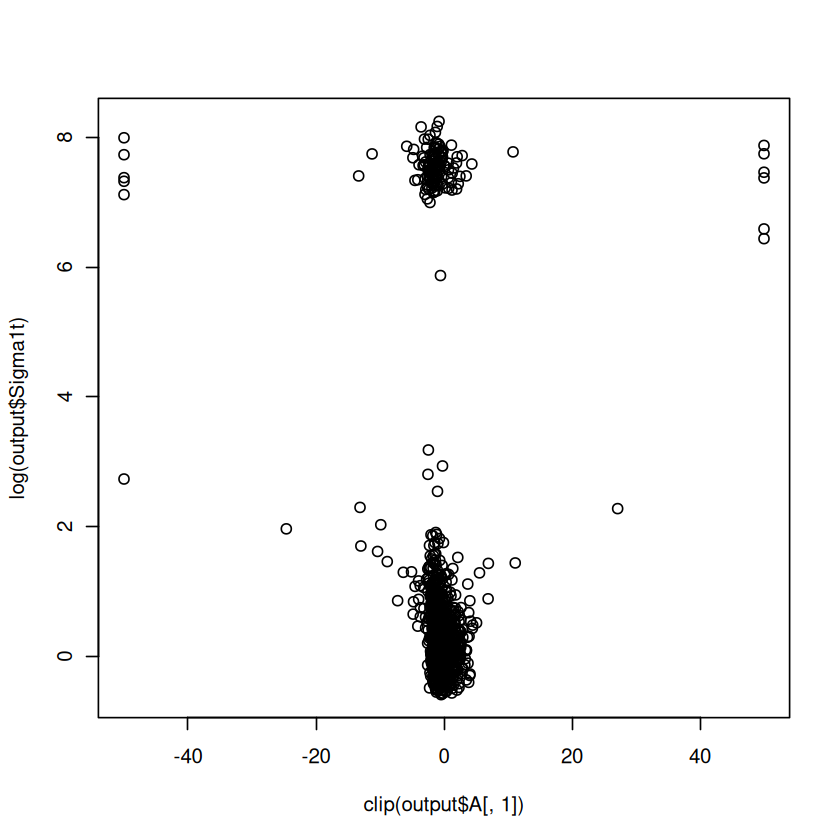

In [84]:
plot(clip(output$A[,1]), log(output$Sigma1t))

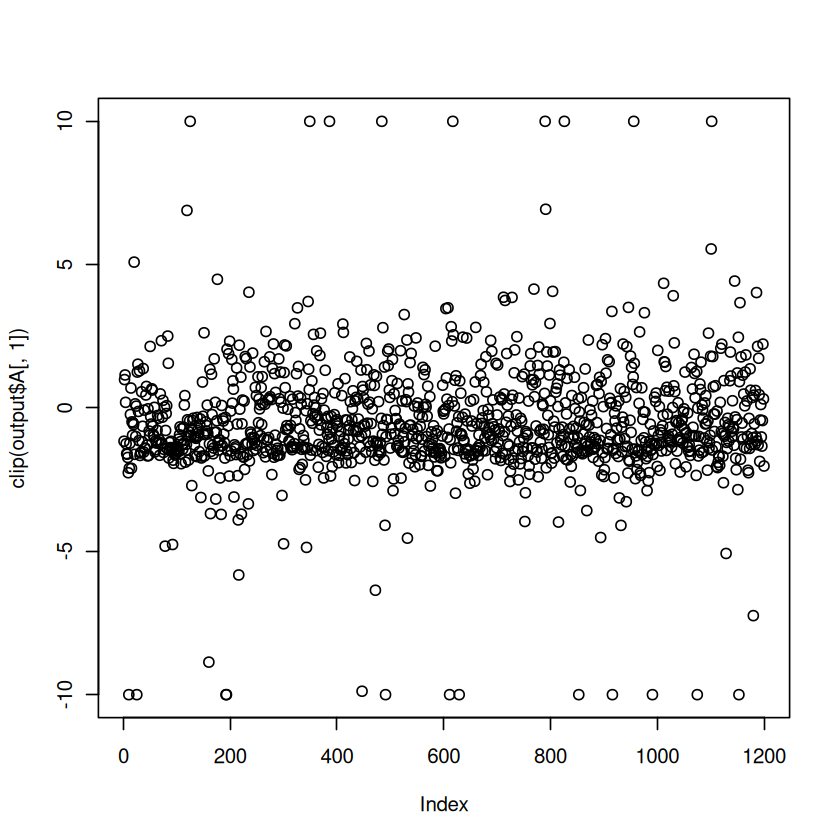

In [95]:
plot(clip(output$A[,1]))

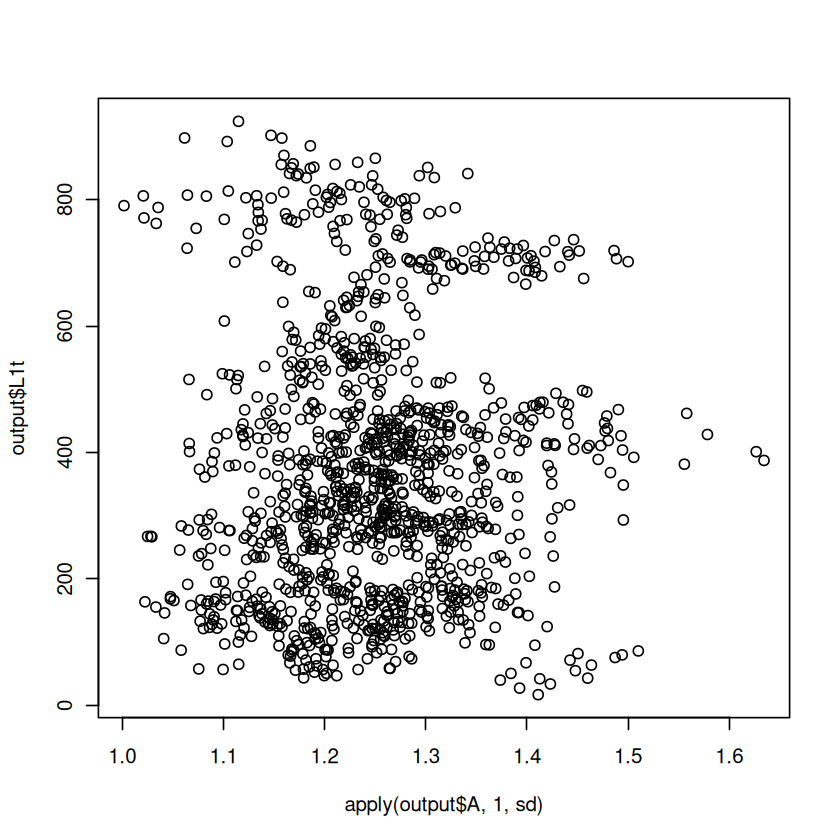

In [94]:
plot(apply(output$A, 1, sd), output$L1t)

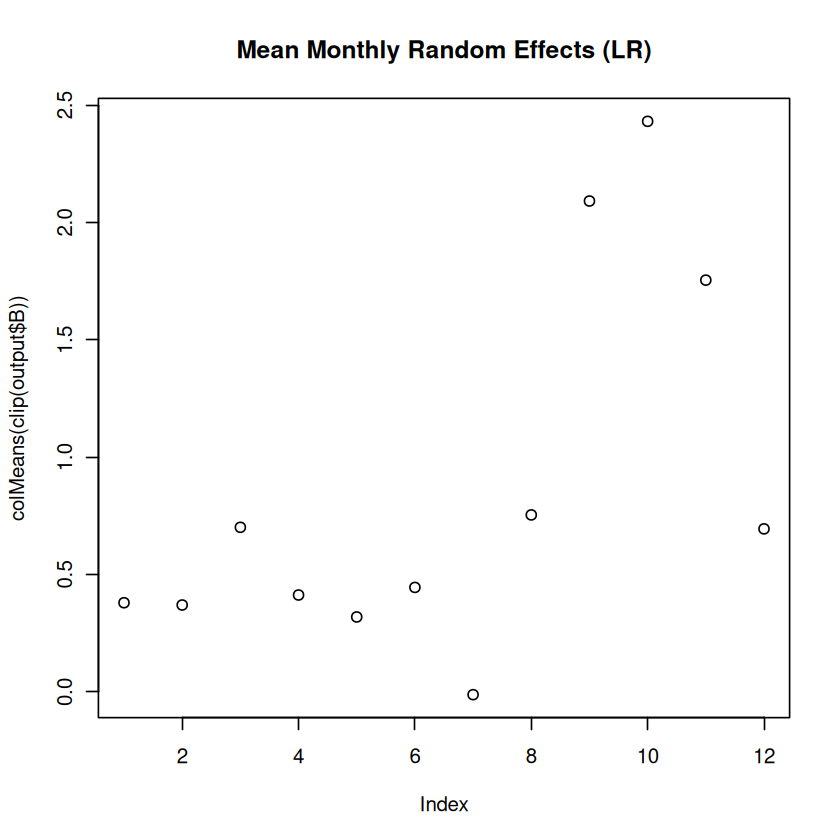

In [167]:
plot(colMeans(clip(output$B)), main="Mean Monthly Random Effects (LR)")

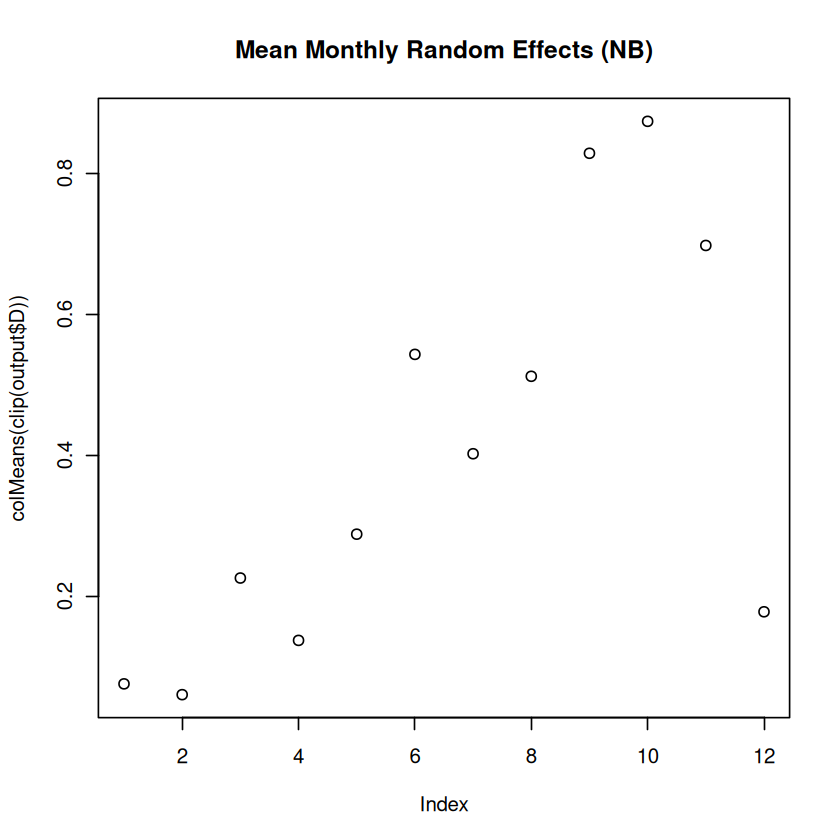

In [165]:
plot(colMeans(clip(output$D)), main="Mean Monthly Random Effects (NB)")

In [173]:
apply(clip(output$B), 2, \(x) quantile(x, probs = c(0.025, 0.975)))

2.5%,-1.976928,-2.024304,-1.681006,-1.945796,-2.027708,-1.937061,-2.368399,-1.605879,-0.2872242,0.1073191,-0.6363993,-1.694031
97.5%,4.568910,4.563612,4.873611,4.496767,4.443376,4.628539,4.165665,4.882521,6.2556188,6.5999879,5.9569301,4.839011


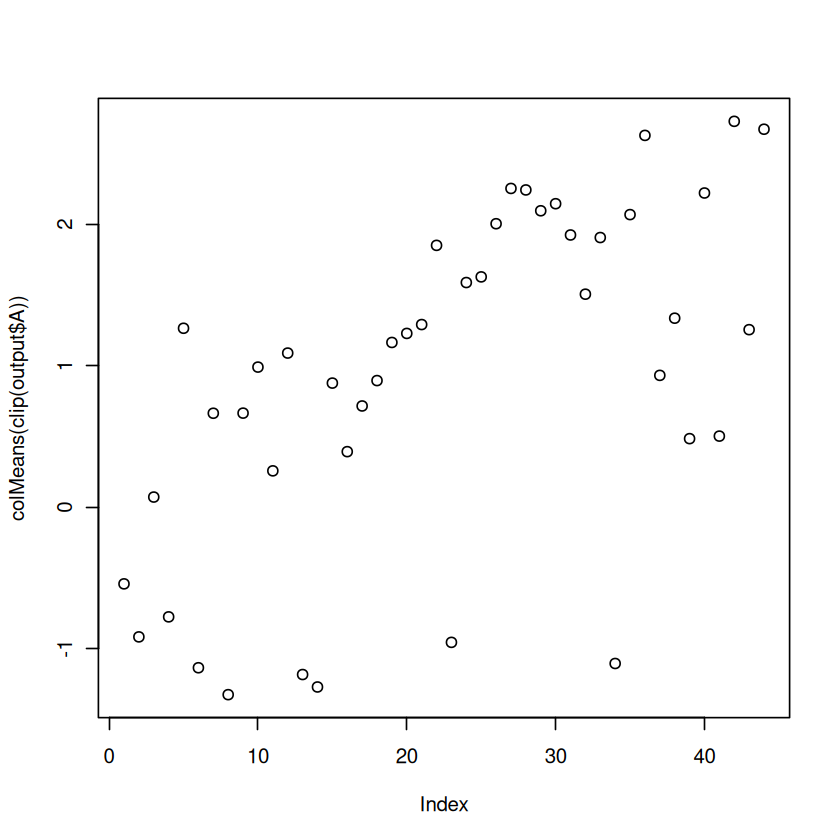

In [179]:
plot(colMeans(clip(output$A)))

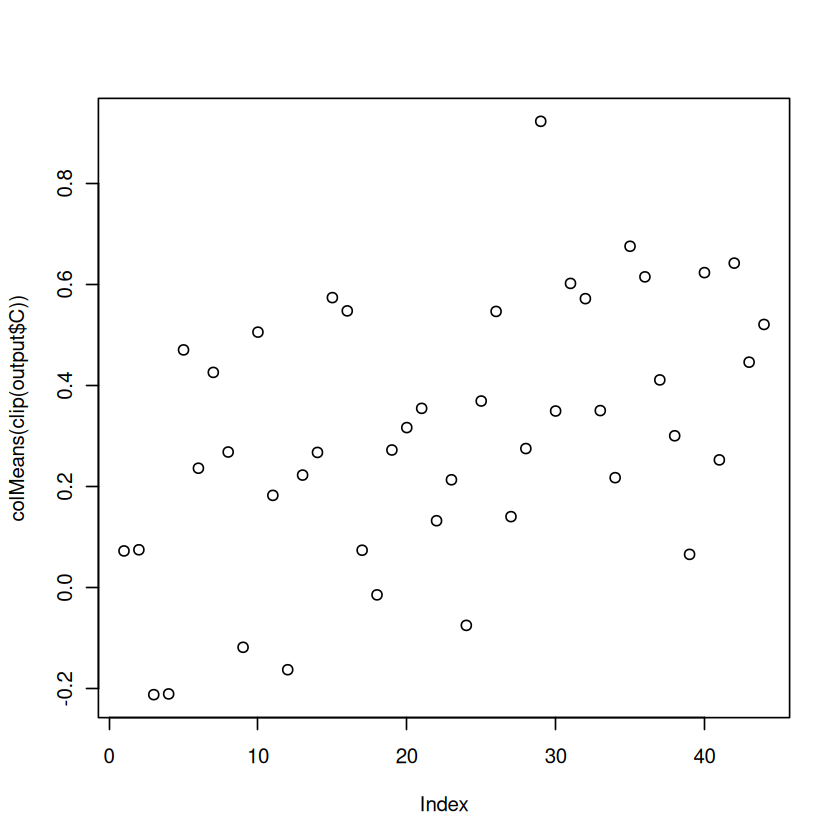

In [180]:
plot(colMeans(clip(output$C)))

In [10]:
interval <- \(x) quantile(x, probs=c(0.025, 0.975))

In [11]:
apply(output$Alpha, 2, interval)

2.5%,-0.1869708,-0.05471346,0.1212911,-0.03993514,3.516984
97.5%,0.2034035,-0.03963408,0.1380426,-0.02441166,3.741190


In [12]:
apply(output$Beta, 2, interval)

2.5%,-0.1883309,-0.02099837,0.01899545,-0.009975521,0.9211492
97.5%,0.1953105,-0.01150676,0.03140984,0.003368129,1.5127197


In [13]:
apply(output$C, 2, interval)

2.5%,-0.993542,-1.174882,-1.279673,-1.287754,-0.6087031,-1.010582,-0.6473149,-0.9773835,-1.245995,-0.594106,⋯,-0.3745774,-0.4266159,-0.6530392,-0.7520341,-1.012993,-0.432501,-0.8687941,-0.4483541,-0.6200033,-0.5506768
97.5%,2.699979,2.492215,2.388429,2.469514,3.1306317,2.868460,3.0877318,2.9569826,2.572986,3.169242,⋯,3.3031143,3.2537211,3.0276745,2.8861153,2.625161,3.252544,2.9826971,3.2689759,3.2437320,3.1253715


In [14]:
colMeans(output$C)

[1] -0.053641252 -0.062494018 -0.342933665 -0.341243898  0.351121089
 [6]  0.096012437  0.305454562  0.155887271 -0.248842194  0.386461935
[11]  0.055732870 -0.292737601  0.070749387  0.156074350  0.455789737
[16]  0.429424413 -0.052683399 -0.142347315  0.149630938  0.194514675
[21]  0.232935201  0.007276781  0.064439834 -0.203033961  0.248681380
[26]  0.428398669  0.015510016  0.152303299  0.810354154  0.227892092
[31]  0.484189179  0.454006045  0.228844892  0.080887402  0.559248958
[36]  0.497899606  0.290175219  0.177938065 -0.060879271  0.506372941
[41]  0.128689015  0.525457408  0.327947743  0.402020552

In [15]:
sigmoid <- \(x) 1 / (1 + exp(-x))

In [16]:
sigmoid(3.7)

[1] 0.975873

In [17]:
lonlat <- read.csv("tidelocs.csv")

In [18]:
colMeans(clip(output$C))

[1]  0.07301348  0.07530795 -0.21131173 -0.20984928  0.47072322  0.23667250
 [7]  0.42622246  0.26868398 -0.11759819  0.50586138  0.18294632 -0.16197751
[13]  0.22307979  0.26787629  0.57413083  0.54791179  0.07440973 -0.01387625
[19]  0.27268051  0.31702307  0.35507413  0.13277012  0.21375966 -0.07425127
[25]  0.36956482  0.54680713  0.14085636  0.27556602  0.92288163  0.34979236
[31]  0.60225225  0.57209034  0.35067747  0.21793574  0.67572302  0.61519915
[37]  0.41132695  0.30082045  0.06622723  0.62357309  0.25312510  0.64238356
[43]  0.44644251  0.52106282

In [19]:
lonlat$A <- colMeans(clip(output$A))
lonlat$C <- colMeans(clip(output$C))

In [114]:
sflonlat <- st_as_sf(lonlat, coords=c("lon", "lat"), crs=4326)
# sflonlat <- st_transform(sflonlat, crs=3857)

In [63]:
xmin <- min(lonlat$lon) - 0.2
xmax <- max(lonlat$lon) + 0.2
ymin <- min(lonlat$lat) - 0.2
ymax <- max(lonlat$lat) + 0.2
ext <- st_bbox(c(xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax), crs=4326)
layer <- basemap_gglayer(ext, map_service = "esri", map_type = "world_ocean_base")

Warning message:
“Transforming 'ext' to Web Mercator (EPSG: 3857), since 'ext' has a different CRS. The CRS of the returned basemap will be Web Mercator, which is the default CRS used by the supported tile services.”


Loading basemap 'world_ocean_base' from map service 'esri'...


In [94]:
ext2 <- st_bbox(st_transform(st_as_sfc(ext), crs=3857))

In [136]:
options(repr.plot.width=12, repr.plot.height=10)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


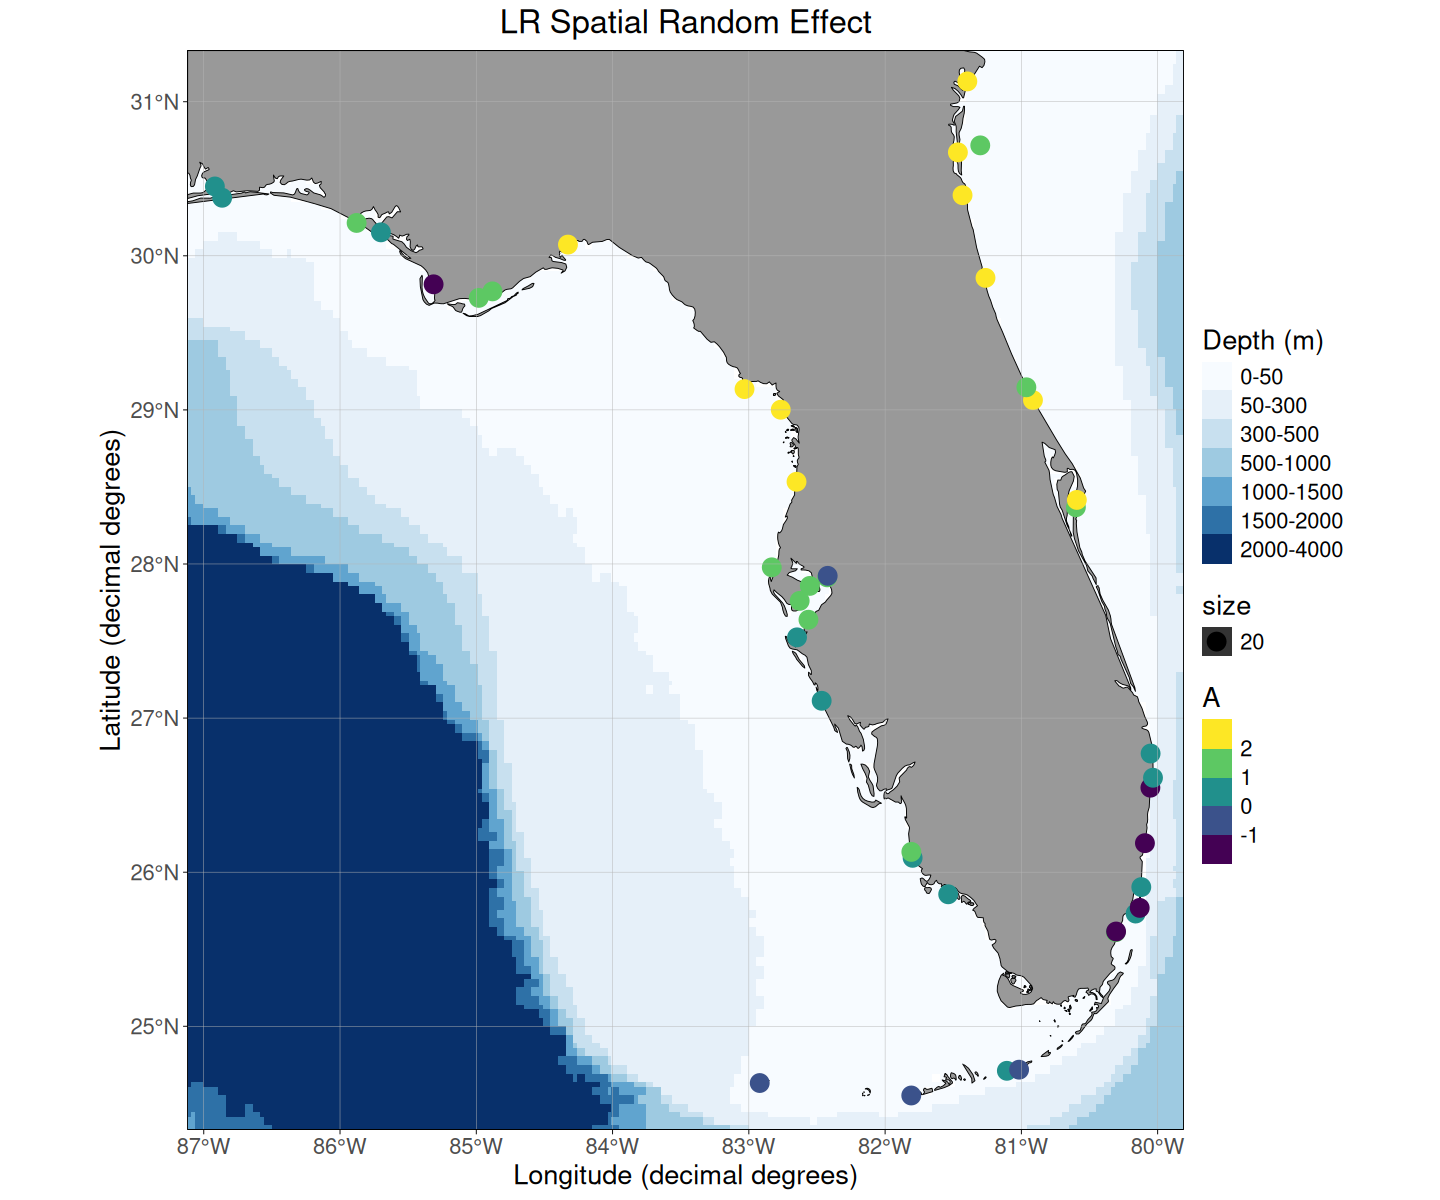

In [156]:
basemap(limits=c(xmin, xmax, ymin, ymax), bathymetry = TRUE) + geom_sf(aes(color=A, size=20), data=sflonlat) + scale_color_viridis_b() + scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
ggtitle("LR Spatial Random Effect") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size=16))

In [189]:
c(xmin + 6, xmax, ymin + 4, ymax - 1.8)

[1] -81.11830 -79.83417  28.35083  29.53170

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 689 rows containing missing values or values outside the scale range (`geom_raster()`).”


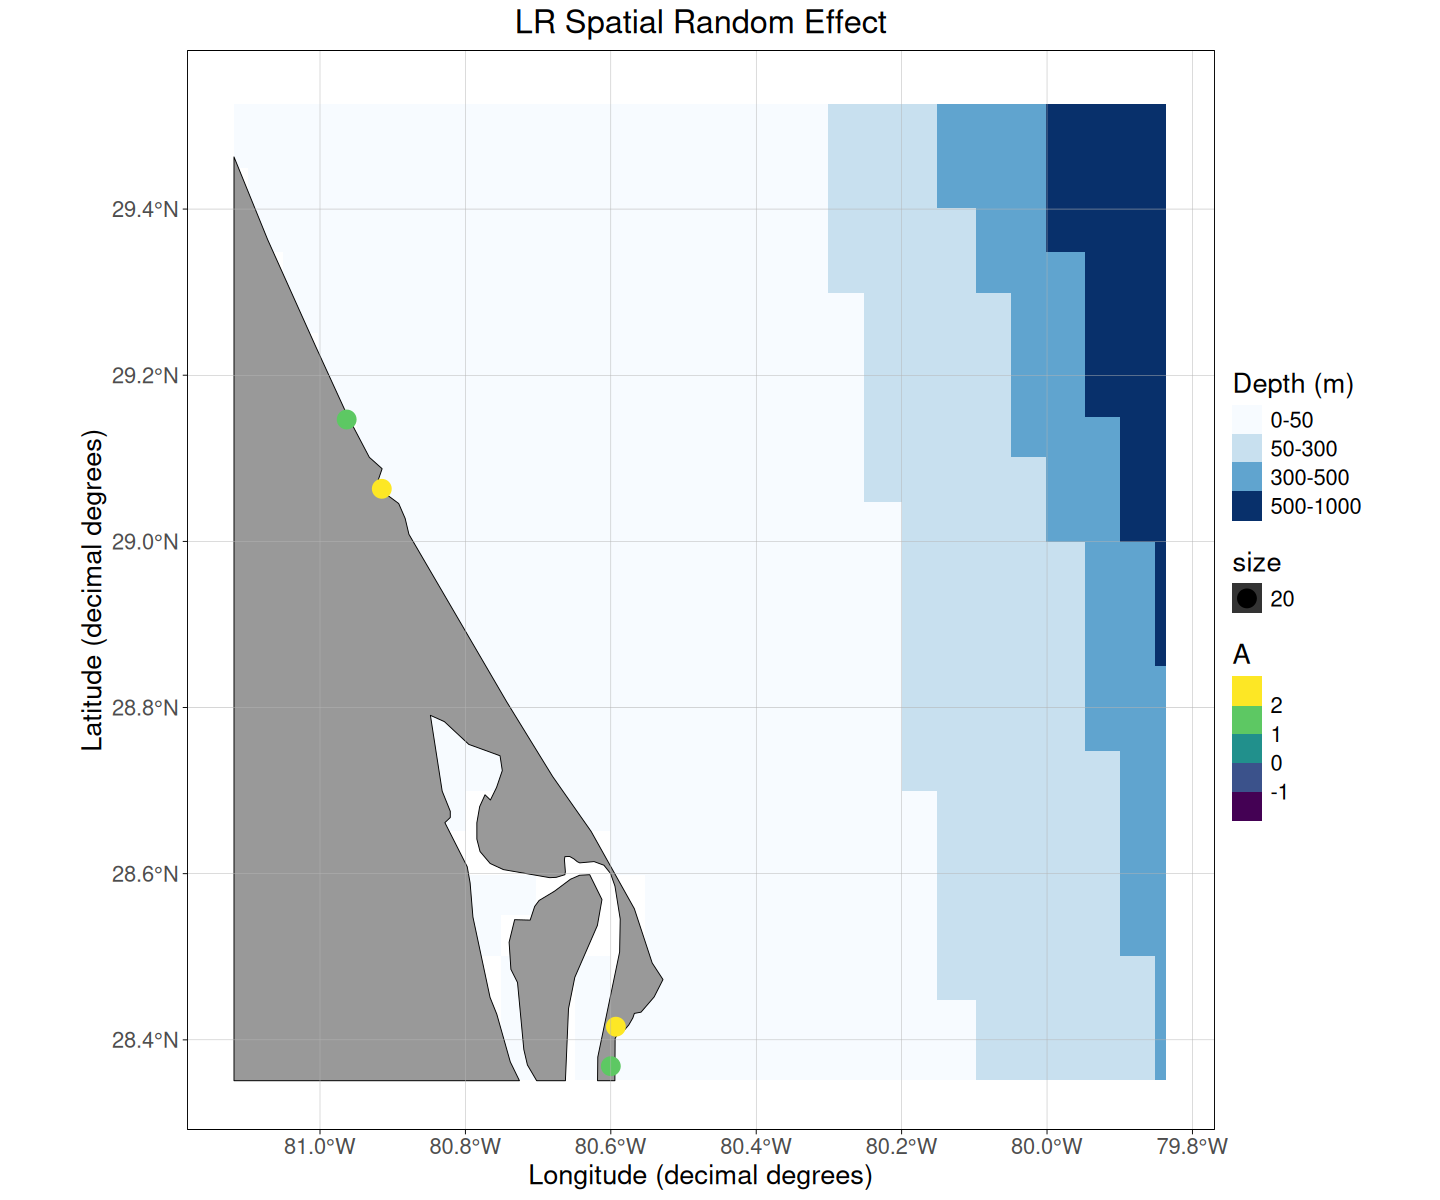

In [ ]:
basemap(limits=c(xmin + 6, xmax, ymin + 4, ymax - 1.8),map_type = , bathymetry = TRUE) + geom_sf(aes(color=A, size=20), data=sflonlat) + scale_color_viridis_b() + scale_x_continuous(expand=c(0,0)) + xlim(xmin + 6, xmax) + scale_y_continuous(expand=c(0,0)) +
ylim(ymin + 4, ymax - 1.8) + ggtitle("LR Spatial Random Effect") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size=16))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


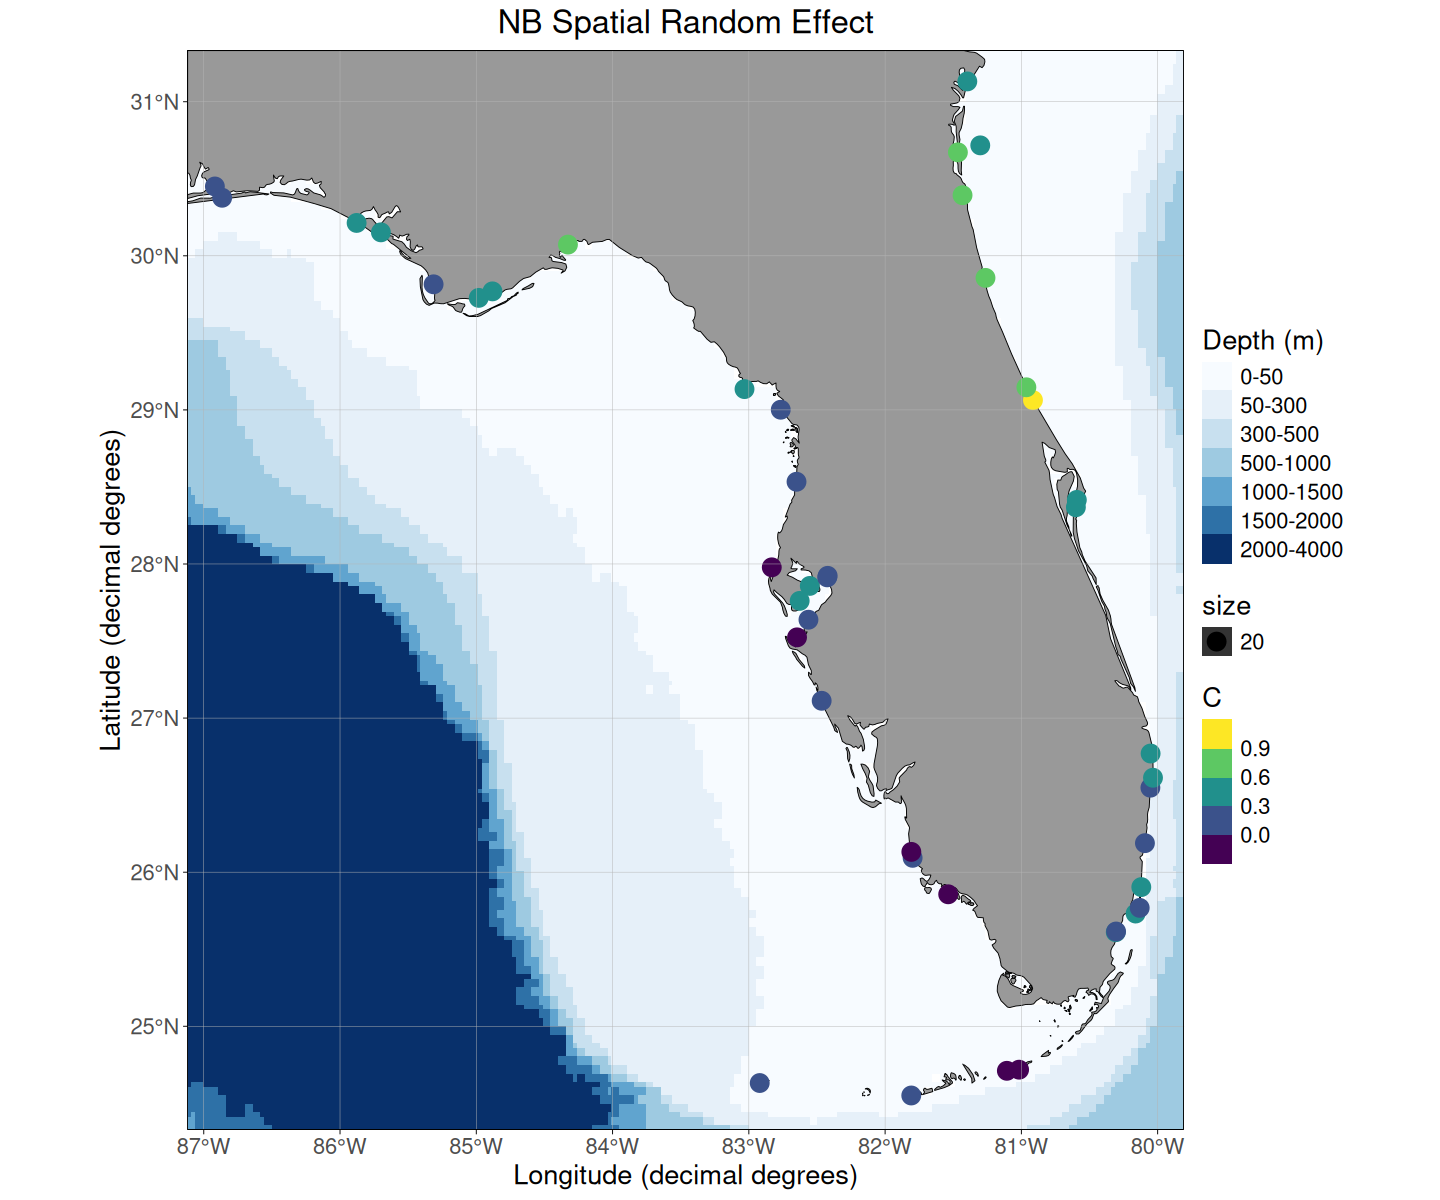

In [158]:
basemap(limits=c(xmin, xmax, ymin, ymax), bathymetry = TRUE) + geom_sf(aes(color=C, size=20), data=sflonlat) + scale_color_viridis_b() + scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
ggtitle("NB Spatial Random Effect") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size=16))